In [38]:
# Exploratory Data Analysis - Big Mart Sales
# Johanes
# Tugas Personal EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
#Get data from source
df = pd.read_csv('bigmart.csv')

df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.0160,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9200,Regular,0.0193,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5000,Low Fat,0.0168,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2000,Regular,0.0000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.9300,Low Fat,0.0000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.3950,Regular,0.0000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.6500,Regular,0.0127,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,nan,Low Fat,0.1275,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2000,Regular,0.0167,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2000,Regular,0.0944,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
#Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#Check Missing Value
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Get row of unique data
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
# Handling row with na values
df.fillna(method='bfill', inplace=True)

In [8]:
# Check Data Duplicate
df[df.duplicated(keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [9]:
# Describe data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.812795,0.066132,140.992782,1997.831867,2181.288914
std,4.641486,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.750000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.750000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

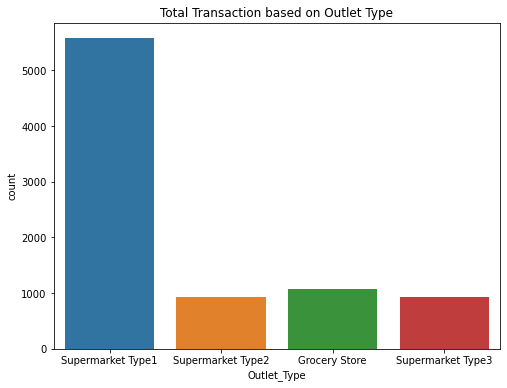

In [11]:
plt.figure(figsize=(8,6))

sns.countplot(df['Outlet_Type'])
plt.title('Total Transaction based on Outlet Type')

plt.show()

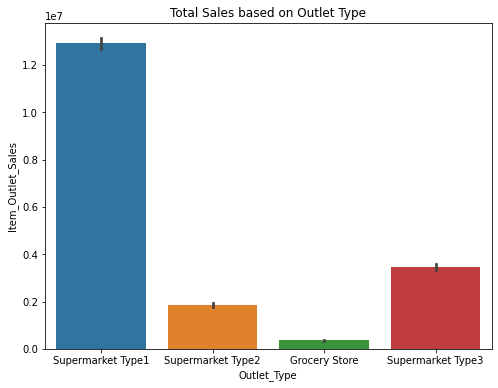

In [12]:
plt.figure(figsize=(8,6))

sns.barplot(df['Outlet_Type'], df['Item_Outlet_Sales'], estimator=sum)
plt.title('Total Sales based on Outlet Type')

plt.show()

In [15]:
dfg = df.groupby(['Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type'], as_index=False)
dfg['Item_Outlet_Sales'].sum().sort_values('Item_Outlet_Sales', ascending=False, ignore_index=True)

,Outlet_Type,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,Supermarket Type1,Small,Tier 2,3826513.7236
1,Supermarket Type3,Medium,Tier 3,3453926.0514
2,Supermarket Type1,Medium,Tier 1,2183969.8102
3,Supermarket Type1,High,Tier 3,2142663.5782
4,Supermarket Type1,Small,Tier 1,2118395.1682
5,Supermarket Type1,Medium,Tier 2,2040567.8088
6,Supermarket Type2,Medium,Tier 3,1851822.8300
7,Supermarket Type1,High,Tier 2,605232.1740
8,Grocery Store,Small,Tier 1,179694.0936
9,Grocery Store,Medium,Tier 3,90048.7842


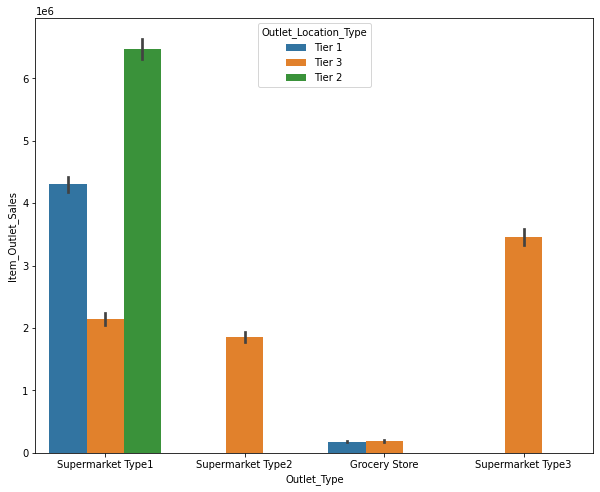

In [16]:
plt.figure(figsize=(10,8))

sns.barplot(df['Outlet_Type'], df['Item_Outlet_Sales'], hue=df['Outlet_Location_Type'], estimator=sum)

plt.show()

In [34]:
# Get count of item_type from highest outlet sales
df_suptyp1 = df[df['Outlet_Type'] == 'Supermarket Type1']
dfg = df_suptyp1.groupby(['Outlet_Type'])
dfg['Item_Type'].value_counts()

Outlet_Type        Item_Type            
Supermarket Type1  Fruits and Vegetables    805
                   Snack Foods              785
                   Household                597
                   Frozen Foods             572
                   Dairy                    450
                   Baking Goods             426
                   Canned                   426
                   Health and Hygiene       335
                   Soft Drinks              300
                   Meat                     257
                   Breads                   160
                   Hard Drinks              145
                   Others                   107
                   Starchy Foods            104
                   Breakfast                 68
                   Seafood                   40
Name: Item_Type, dtype: int64

In [36]:
# Get count of item_type from lowest outlet sales
df_grstr = df[df['Outlet_Type'] == 'Grocery Store']
dfg = df_grstr.groupby('Outlet_Type')
dfg['Item_Type'].value_counts()

Outlet_Type    Item_Type            
Grocery Store  Fruits and Vegetables    152
               Snack Foods              146
               Household                119
               Frozen Foods             103
               Dairy                     92
               Baking Goods              85
               Canned                    73
               Health and Hygiene        67
               Meat                      66
               Soft Drinks               54
               Breads                    33
               Others                    27
               Hard Drinks               24
               Breakfast                 19
               Starchy Foods             13
               Seafood                   10
Name: Item_Type, dtype: int64

In [37]:
# Insight

# Berdasarkan data di atas di dapat bahwa:
# 1. Total Transaksi dan Sales tertinggi ada di supermarket type1
# 2. Total Sales terkecil ada di Grocery Store padahal Total transaksi di Grocery Store bukan merupakan yang terkecil.
# 3. 4 Item terbanyak dibeli di Supermarket Type 1 dan Grocery Store adalah Fruits and Vegetables, Snack Foods, Household, Frozen Foods

# Saran & Rekomendasi
# Grocery Store terdiri dari 3 size (small, medium, high), alangkah lebih baik untuk mengecilkan ukuran size dari outlet tersebut menjadi small,
# hal ini dapat menghemat biaya operasional yg timbul, sehingga keuntungan yg didapat bisa lebih maksimal